In [1]:
from data_setup import data_lr, data_hr, data_csm, data_reproj, info_lr, info_hr, info_reproj

convolution complete.
starting reprojection...


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


reprojection complete.


In [82]:
from matplotlib import pyplot as plt
import numpy as np
from astropy import units as u
import cmasher as cmr

In [3]:
from radial import radial_read

In [121]:
info_reproj['pix_size_arcsec'] =info_lr['pix_size_arcsec']
info_csm = {'position': (443, 443),
 'median': 6.78704772e-08,
 'pix_size_arcsec': 0.036*u.arcsec}

In [27]:
lr_radius, lr_rp_1d = radial_read(data_lr['jy_pix'][0,0,...],info_lr)
hr_radius, hr_rp_1d = radial_read(data_hr['jy_pix'][0,0,...],info_hr)
reproj_radius, reproj_rp_1d = radial_read(data_reproj['jy_pix_norm'][0,0,...], info_reproj)
csm_radius, csm_rp_1d = radial_read(data_csm['jy_pix'], info_lr)

In [29]:
lowcolor = 'steelblue'
highcolor='crimson'


In [36]:
from dens import density_model

In [53]:
num_1d_model_hr = density_model(hr_rp_1d,hr_radius['pc_1d'])
num_1d_model_lr = density_model(lr_rp_1d,lr_radius['pc_1d'])

num_1d_model_reproj = density_model(reproj_rp_1d,reproj_radius['pc_1d'])
num_1d_model_csm = density_model(csm_rp_1d,csm_radius['pc_1d'])


Text(0, 0.5, 'Density (g/cm2)')

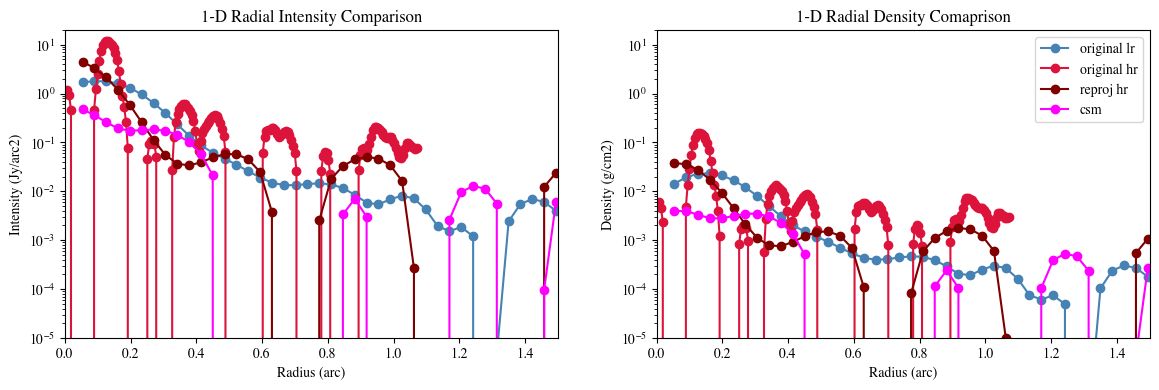

In [119]:
plt.rcParams["font.family"] = "times"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [14,4])


ax1.plot(lr_radius['arc_1d'],lr_rp_1d.value,'o-', label = 'original lr', c = lowcolor)
ax1.plot(hr_radius['arc_1d'],hr_rp_1d.value,'o-', label = 'original hr', c = highcolor)
ax1.plot(reproj_radius['arc_1d'],reproj_rp_1d.value,'o-', label = 'reproj hr', c = 'maroon')
ax1.plot(csm_radius['arc_1d'], csm_rp_1d.value, 'o-', label = 'csm', c = 'fuchsia')

ax2.plot(lr_radius['arc_1d'],num_1d_model_lr.value,'o-', label = 'original lr', c = lowcolor)
ax2.plot(hr_radius['arc_1d'],num_1d_model_hr.value,'o-', label = 'original hr', c = highcolor)
ax2.plot(reproj_radius['arc_1d'],num_1d_model_reproj.value,'o-', label = 'reproj hr', c = 'maroon')
ax2.plot(csm_radius['arc_1d'], num_1d_model_csm.value, 'o-', label = 'csm', c = 'fuchsia')


ax2.legend(loc = 'best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
ax1.set_xlim(0,1.5)
ax2.set_xlim(0,1.5)
ax1.set_ylim(1e-5, 2e1)
ax2.set_ylim(1e-5, 2e1)

ax1.semilogy()
ax2.semilogy()
ax1.set_title("1-D Radial Intensity Comparison")
ax2.set_title("1-D Radial Density Comaprison")
ax1.set_xlabel('Radius (arc)')
ax2.set_xlabel('Radius (arc)')
ax1.set_ylabel('Intensity (Jy/arc2)')
ax2.set_ylabel('Density (g/cm2)')

can I manage 2D?

In [77]:
hr_2d_density = density_model(data_hr['jy_arc2'][0,0,...],hr_radius['pc_2d'])
lr_2d_density = density_model(data_lr['jy_arc2'][0,0,...],lr_radius['pc_2d'])
reproj_2d_density = density_model(data_reproj['jy_arc2'][0,0,...],reproj_radius['pc_2d'])
csm_2d_density = density_model(data_csm['jy_arc2'],csm_radius['pc_2d'])

/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [94]:
info_csm = {'position': (443, 443),
 'median': 6.78704772e-08,
 'pix_size_arcsec': 0.036*u.arcsec}

In [109]:
data_sets = [data_hr['jy_arc2'][0,0,...], data_lr['jy_arc2'][0,0,...], data_reproj['jy_arc2'][0,0,...], data_csm['jy_arc2'].value, 
             hr_2d_density.value, lr_2d_density.value, reproj_2d_density.value, csm_2d_density.value]

info_hr['cmap'] = cmr.flamingo
info_lr['cmap'] = cmr.flamingo
info_reproj['cmap'] = cmr.flamingo
info_csm['cmap'] = "PRGn"



info_sets = [info_hr, info_lr, info_reproj, info_csm,info_hr, info_lr, info_reproj, info_csm]
titles = ["HR Data (Jy/arc2)", "LR Data (Jy/arc2)", "Conv After Reprojection (Jy/arc2)", "Circumstellar Material (Jy/arc2)", 
          "HR Density (g/cm2)", "LR Density (g/cm2)", "HR Conv Resampled Density (g/cm2)", "CSM Density (g/cm2)"]

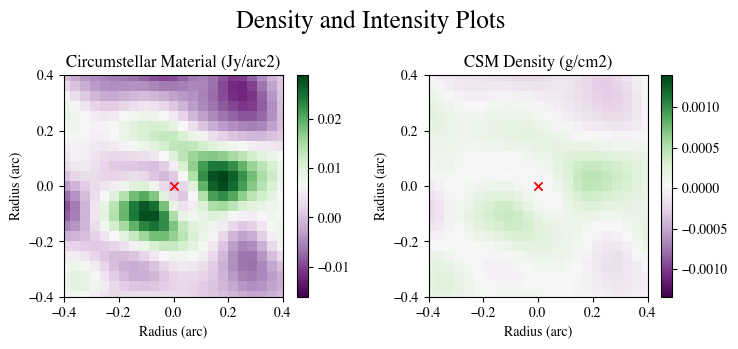

In [141]:
minn=-0.4
maxx=-minn
figure,axs = plt.subplots(nrows = 1, ncols=2, figsize = (7.5,3.5))#, subplot_kw={'projection': wcs})
figure.suptitle("Density and Intensity Plots", fontsize = 18)
i = 3


for j,ax in zip(range(2), axs.ravel()):

     range(data_sets[i].shape[0])

     xaxis = range(data_sets[i].shape[0])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][1])*info_sets[i]['pix_size_arcsec'])
     yaxis = range(data_sets[i].shape[1])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][0])*info_sets[i]['pix_size_arcsec'])
     
     im = ax.pcolormesh(xaxis,yaxis,data_sets[i], cmap=info_sets[i]['cmap'],shading="nearest")
     ax.plot((info_sets[i]['position'][1])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][1])*info_sets[i]['pix_size_arcsec']),
             (info_sets[i]['position'][0])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][0])*info_sets[i]['pix_size_arcsec']),'rx')
     ax.plot(0,0,'rx')

     ax.set_title(titles[i])
     ax.set_xlim(minn, maxx)
     ax.set_ylim(minn, maxx)
     fig.colorbar(im,ax=ax)
     ax.set_xlabel("Radius (arc)")
     ax.set_ylabel("Radius (arc)")

     i+=4

figure.tight_layout(pad = 1)
plt.show()

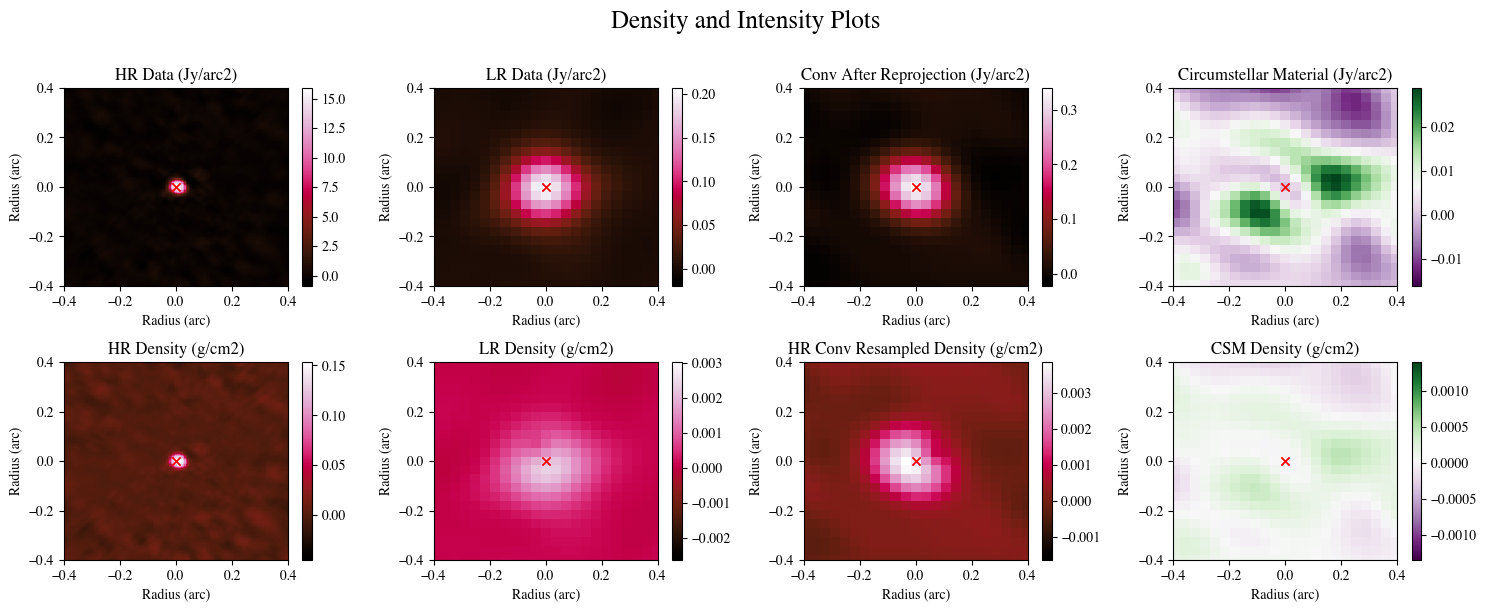

In [120]:
minn=-0.4
maxx=-minn
figure,axs = plt.subplots(nrows = 2, ncols=4, figsize = (15,6))#, subplot_kw={'projection': wcs})
figure.suptitle("Density and Intensity Plots", fontsize = 18, y=1.01)

for i,ax in zip(range(len(data_sets)), axs.ravel()):
     range(data_sets[i].shape[0])

     xaxis = range(data_sets[i].shape[0])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][1])*info_sets[i]['pix_size_arcsec'])
     yaxis = range(data_sets[i].shape[1])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][0])*info_sets[i]['pix_size_arcsec'])
     
     im = ax.pcolormesh(xaxis,yaxis,data_sets[i], cmap=info_sets[i]['cmap'],shading="nearest")
     ax.plot((info_sets[i]['position'][1])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][1])*info_sets[i]['pix_size_arcsec']),
             (info_sets[i]['position'][0])*info_sets[i]['pix_size_arcsec']-((info_sets[i]['position'][0])*info_sets[i]['pix_size_arcsec']),'rx')
     ax.plot(0,0,'rx')

     ax.set_title(titles[i])
     ax.set_xlim(minn, maxx)
     ax.set_ylim(minn, maxx)
     fig.colorbar(im,ax=ax)
     ax.set_xlabel("Radius (arc)")
     ax.set_ylabel("Radius (arc)")

figure.tight_layout(pad = 1)
plt.show()